In [2]:
import numpy as np
import pandas as pd
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#read csv, csv파일 읽기
url="https://raw.githubusercontent.com/SongJuHo-0410/AI_Engineering/master/car%20data.csv"
df=pd.read_csv(url)

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# fname 옵션을 사용하는 방법
path = 'C:\\WINDOWS\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

Malgun Gothic


- **과제 수행 가이드:**

 

  - 비즈니스 문제 정의와 분석 목적 도출 과정 제시

  - 해당 데이터에 대한 도메인 지식 설명

  - 데이터의 통계적 측정과 분석

  - 데이터 시각화

  - 예측 모델 구축 (제시한 데이터는 일반적으로 "Selling_Price" 예측 모델이지만, 다른 목적의 모델도 가능)

  - 모델 해석 및 결론

In [250]:
#데이터프레임의 처음 5개 행 확인
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0



<summary><h3>비즈니스 문제 정의와 분석 목적 도출 과정 제시</summary>
<details>

- 비즈니스 문제 정의 : 중고차의 판매 가격을 예측하는 모델을 만들고자 합니다. 중고차의 가치를 정확히 파악하고 적절한 가격으로 판매되는지 파악하는데 도움을 줄 수 있습니다.

- 분석 목적 도출 과정:  
    
    1. 데이터 이해와 탐색:  
        - 데이터프레임을 살펴보고 각 열의 의미와 형식을 파악합니다.  
        - 열에 대한 설명 및 가능한 값들에 대한 추가 정보가 있는지 확인합니다.      
            
    2. 변수 선택 및 데이터 전처리:

        - 예측 모델에 사용할 변수를 선택합니다. 예를 들어, "Year", "Present_Price", "Driven_kms", "Fuel_Type", "Transmission" 등이 중요한 변수로 선택될 수 있습니다.
        - 필요한 경우, 결측치 처리, 이상치 탐지 및 처리, 범주형 변수의 인코딩 등의 데이터 전처리 작업을 수행합니다.
          
    3. 탐색적 데이터 분석:
        - 변수 간의 상관 관계, 분포, 이상치, 중복 등을 확인하여 데이터의 특성을 이해합니다.
        - 특정 변수 또는 변수 조합이 중고차 가격에 미치는 영향을 탐색합니다.
        
    4. 모델 개발과 평가:
        - 예측 모델을 선택하고 훈련 및 평가를 수행합니다. 랜덤 포레스트 모델을 하여 진행합니다.
        - 예측 성능 지표를 사용하여 모델의 성능을 평가하고 필요한 경우 모델을 튜닝합니다.
        
    5. 결과 해석 및 활용:
        - 개발한 예측 모델을 활용하여 중고차의 판매 가격을 예측할 수 있습니다.
        - 중요한 변수와 그 영향력을 이해하고 비즈니스적으로 해석할 수 있도록 결과를 해석합니다.
        - 이를 통해 판매자는 적정 가격을 제시하고 구매자는 신뢰성 있는 거래를 진행할 수 있습니다.

</details>


<h3>해당 데이터에 대한 도메인 지식 설명</h3>

<details>

- Car_Name : 모델 명
- Year : 연식
- Selling_Price : 판매가
- Present_Price : 출고가
- Driven_kms : 주행 거리
- Fuel_Type : 연료
- Selling_type : 판매 형태
- Transmission : 변속기
- Owner : 소유자 변경(횟수)

해당 데이터를 제공하는 사이트에서 이름은 Car Price Prediction(used cars)로 차량과 관련된 데이터이며 모델 명, 연식, 판매가, 출고가, 주행 거리, 연료, 판매 형태, 변속기, 소유자 변경(횟수)로 총 9개의 변수가 있습니다. 또한 태그에 India를 통해 해당 데이터는 인도의 중고차 판매와 관련된 데이터라고 파악할 수 있습니다. 따라서 돈 단위도 인도의 루피라고 파악하였습니다.

</details>

<h3>데이터의 통계적 측정과 분석

In [251]:
#데이터프레임의 처음 5개 행 확인
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [252]:
#데이터프레임의 행과 열의 개수 확인
df.shape

(301, 9)

In [253]:
# 데이터프레임의 결측치 확인
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [254]:
# 데이터프레임 정보 출력
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [255]:
# 데이터프레임 요약 통계 출력
print(df.describe())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [256]:
#연료별 데이터 종류의 개수 파악
print(df.Fuel_Type.value_counts().sort_index())

CNG         2
Diesel     60
Petrol    239
Name: Fuel_Type, dtype: int64


- CNG(Compressed Natural Gas) : 압축천연가스
- diesel : 경유
- petrol : 휘발유

연료는 3가지 종류가 있으며 휘발유가 239개로 가장 많은 비율을 차지

In [257]:
#판매 형태별 데이터 종류의 개수 파악
print(df.Selling_type.value_counts().sort_index())

Dealer        195
Individual    106
Name: Selling_type, dtype: int64


- Dealer : 판매원
- Individual : 개인

판매 형태는 판매원과 개인이 있으며 다수가 판매원을 통해 거래

In [258]:
#변속기별 데이터 종류의 개수 파악
print(df.Transmission.value_counts().sort_index())

Automatic     40
Manual       261
Name: Transmission, dtype: int64


- Automatic : 자동
- Manual : 수동

변속기는 자동과 수동이 있으며 수동이 261개로 많은 비율을 차지

In [259]:
#년도별 데이터 개수 파악
print(df.Year.value_counts().sort_index())

2003     2
2004     1
2005     4
2006     4
2007     2
2008     7
2009     6
2010    15
2011    19
2012    23
2013    33
2014    38
2015    61
2016    50
2017    35
2018     1
Name: Year, dtype: int64


년도별로 2015년식 차량이 가장 많은 비율을 차지

In [260]:
print(df.Car_Name.value_counts().sort_index())

800                   1
Activa 3g             2
Activa 4g             1
Bajaj  ct 100         1
Bajaj Avenger 150     1
                     ..
sx4                   6
verna                14
vitara brezza         1
wagon r               4
xcent                 3
Name: Car_Name, Length: 98, dtype: int64


서로 다른 89개의 모델이 존재

<h3>예측 모델 구축</h3>

- 예측 모델 : 랜덤 포레스트
- 이유 : 데이터의 개수가 301개로 모델을 예측하는데 적은 데이터라 판단 따라서 랜덤 포레스트의 장점인 부트스트래핑과 랜덤한 속성 선택, 앙상블 방식을 통해 적은 데이터로도 다양한 훈련 데이터와 속성 조합을 활용하여 더욱 좋은 예측 모델을 만들 수 있을거라 기대

In [4]:
#read csv, csv파일 읽기
url="https://raw.githubusercontent.com/SongJuHo-0410/AI_Engineering/master/car%20data.csv"
df=pd.read_csv(url)

#범주형 데이터를 수치형 데이터로 변환(데이터 수에 따라 오름차순으로 정렬)
df.replace({'Fuel_Type':{'CNG':0,'Diesel':1,'Petrol':2}},inplace=True)
df.replace({'Selling_type':{'Individual':0,'Dealer':1}},inplace=True)
df.replace({'Transmission':{'Automatic':0,'Manual':1}},inplace=True)

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,1,1,0
1,sx4,2013,4.75,9.54,43000,1,1,1,0
2,ciaz,2017,7.25,9.85,6900,2,1,1,0
3,wagon r,2011,2.85,4.15,5200,2,1,1,0
4,swift,2014,4.60,6.87,42450,1,1,1,0


In [5]:
# 특성과 타깃 데이터로 분할
X = df.drop(['Car_Name', 'Selling_Price'], axis=1) #모델 명을 수치형 변수로 변경하면 오버피팅, 정보손실 등 발생할 수 있어 제거
y = df['Selling_Price'] #중고차 판매가를 예측하기 위해 판매가를 타깃으로 설정

In [6]:
# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(random_state=42)

In [8]:
# 모델 훈련
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
# 예측
y_pred = rf_model.predict(X_test)

In [10]:
# 평가: 평균 제곱 오차 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# R-squared 값을 계산
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 0.8547236608196712
R-squared: 0.9628955080316364


랜덤 포레스트를 사용하여 8:2로 훈련셋과 테스트셋을 나누어 진행하였을 때 
- Mean Squared Error: 0.8547236608196712
- R-squared: 0.9628955080316364

<h3>데이터 시각화 및 모델 개선

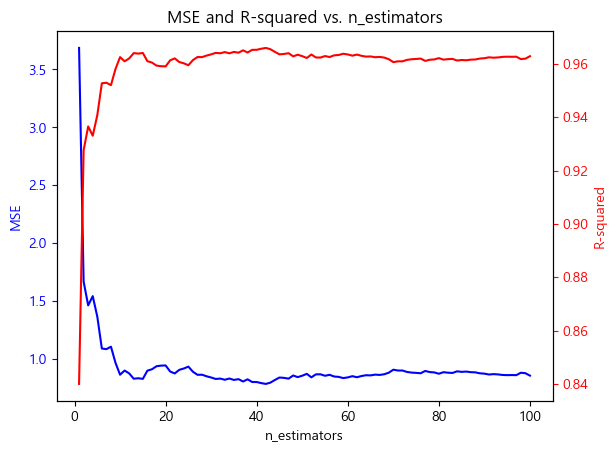

최소 MSE: 0.7831374986059993, 해당하는 n_estimators: 42
최대 R-squared: 0.9660031418818049, 해당하는 n_estimators: 42


In [11]:
# MSE 및 R-squared 값을 저장할 리스트
mse_values = []
r2_values = []

# 최소 MSE 및 최대 R-squared 값을 저장할 변수와 해당하는 n_estimators 값을 저장할 변수
min_mse = np.inf
max_r2 = -np.inf
min_mse_n_estimators = None
max_r2_n_estimators = None

# n_estimators 값을 1부터 100까지 변화시키면서 모델 학습
for n in range(1, 101):
    # 랜덤 포레스트 모델 생성 및 학습
    model = RandomForestRegressor(n_estimators=n,random_state=42)
    model.fit(X_train, y_train)

    # 모델 예측값 계산
    y_pred = model.predict(X_test)

    # MSE 및 R-squared 계산 및 리스트에 추가
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    r2 = r2_score(y_test, y_pred)
    r2_values.append(r2)

    # 최소 MSE와 해당하는 n_estimators 값을 저장
    if mse < min_mse:
        min_mse = mse
        min_mse_n_estimators = n

    # 최대 R-squared와 해당하는 n_estimators 값을 저장
    if r2 > max_r2:
        max_r2 = r2
        max_r2_n_estimators = n

# 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(range(1, 101), mse_values, 'b-')
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('MSE', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(range(1, 101), r2_values, 'r-')
ax2.set_ylabel('R-squared', color='r')
ax2.tick_params('y', colors='r')

plt.title('MSE and R-squared vs. n_estimators')
plt.show()

print(f"최소 MSE: {min_mse}, 해당하는 n_estimators: {min_mse_n_estimators}")
print(f"최대 R-squared: {max_r2}, 해당하는 n_estimators: {max_r2_n_estimators}")

랜덤 포레스트를 사용하여 8:2로 훈련셋과 테스트셋을 나누어 42회 진행하였을 때 
- 최소 MSE: 0.7831374986059993
- 최대 R-squared: 0.9660031418818049

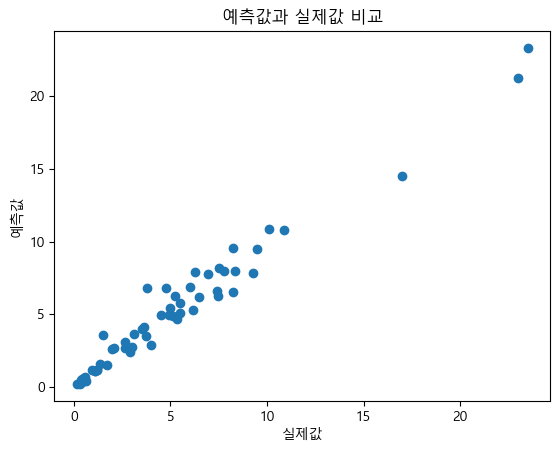

In [13]:
# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(n_estimators=42,random_state=42)

# 모델 훈련
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 예측값과 실제값 비교
plt.scatter(y_test, y_pred)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('예측값과 실제값 비교')
plt.show()


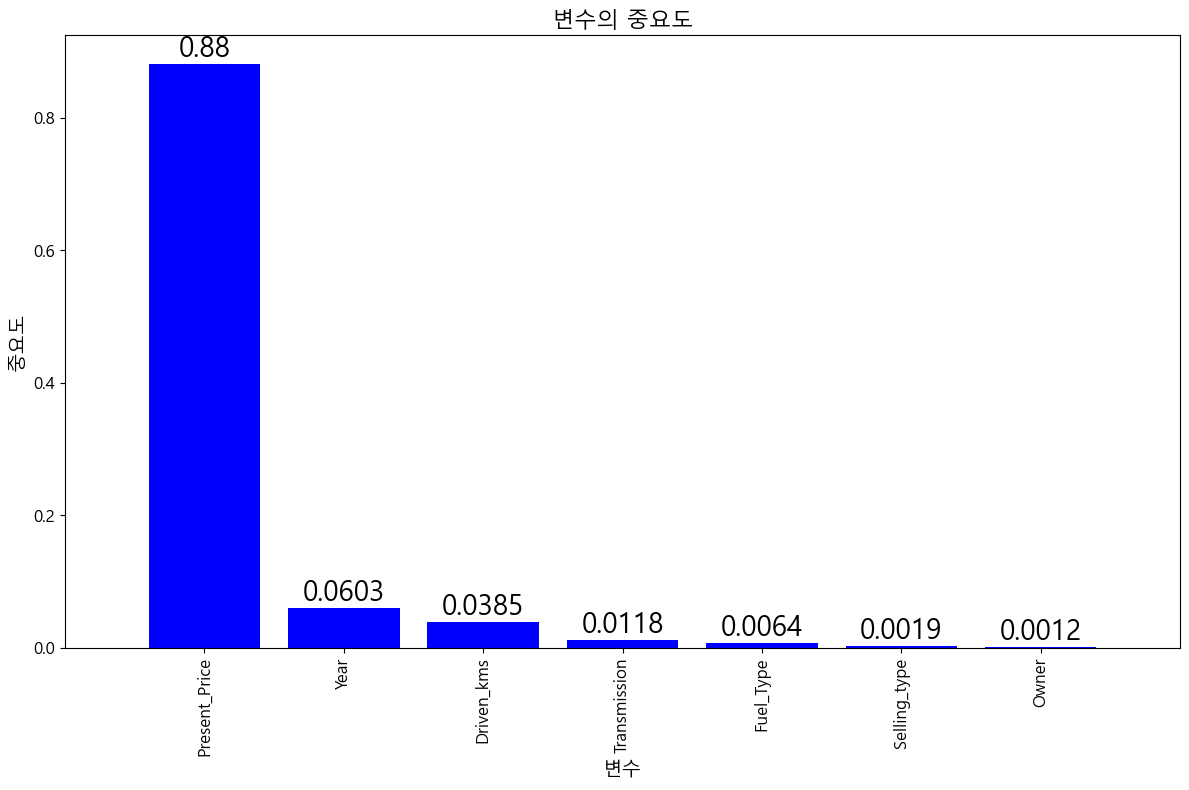

In [14]:
# 각 피처의 중요도 계산
importances = model.feature_importances_

# 중요도를 내림차순으로 정렬하여 인덱스 배열 생성
indices = np.argsort(importances)[::-1]

# 중요도 시각화 및 값 출력
plt.figure(figsize=(12, 8))
plt.title("변수의 중요도", fontsize=16)
bars = plt.bar(range(X.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("변수", fontsize=14)
plt.ylabel("중요도", fontsize=14)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()

# 각 피처에 대한 값 출력
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha='center', va='bottom', fontsize=20)

plt.show()

c:\Users\sojh0\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\sojh0\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


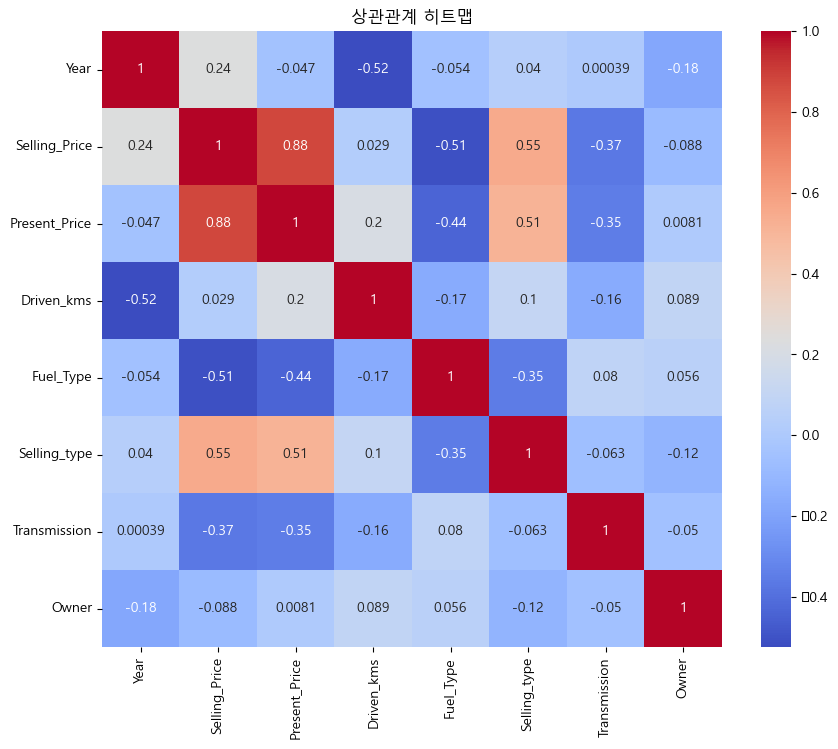

In [15]:
# 변수 간 상관 계수 계산
correlation_matrix = df.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('상관관계 히트맵')
plt.show()

<h3>모델 해석 및 결론

모델 해석 : 
다음 변수들을 알고 있다면 중고차의 판매가를 예측할 수 있습니다.

    - Year : 연식
    - Selling_Price : 판매가
    - Present_Price : 출고가
    - Driven_kms : 주행 거리
    - Fuel_Type : 연료
    - Selling_type : 판매 형태
    - Transmission : 변속기
    - Owner : 소유자 변경(횟수)

- R-squared는 0.9660031418818049로 1에 가깝습니다.
- mse는 0.7831374986059993로 0에 가깝습니다.    

해당 모델은 높은 성능을 보이고 있으며 판매가를 높은 확률로 예측할 수 있습니다.     



결론 : 
- 랜덤 포레스트로 학습시킨 모델에서는 각 변수들 중 중요도를 파악하였을 때 88%로 출고가가 매우 높게 나왔으며 판매가와 출고가의 상관 관계가 0.88로 매우 높고 출고가가 높으면 판매가가 높은 건 당연하기 때문입니다. 출고가 다음으로 년도, 주행거리, 변속기, 연료, 판매 형태, 소유자 변경 순입니다.   

- 중고차 판매가에 있어서 중요도 순위
    1. 출고가
    2. 년도
    3. 주행거리
    4. 변속기
    5. 연료
    6. 판매 형태
    7. 소유자 변경(횟수)
    
다음과 같은 순위로 중고차 판매에 영향을 미칩니다. 